# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
lat = []
lng = []
cloudy = []
humidity = []
winds = []
temperature = []
city_name = []

for city in cities:
    url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID='+api_key+'&q='+city
    response = requests.get(url).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        cloudy.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        winds.append(response['wind']['speed'])
        temperature.append(response['main']['temp'])
        city_name.append(response['name'])
        print(f'Retrieving {city} Data')
    except:
        print(f'Skipping {city}')
        
        


Retrieving cockburn town Data
Retrieving suntar Data
Retrieving port alfred Data
Retrieving jacareacanga Data
Retrieving wucheng Data
Retrieving trebinje Data
Retrieving tazovskiy Data
Retrieving bluff Data
Retrieving tuatapere Data
Retrieving marawi Data
Retrieving saint george Data
Retrieving hermanus Data
Skipping sentyabrskiy
Retrieving acapulco Data
Retrieving lompoc Data
Skipping tumannyy
Retrieving kagadi Data
Skipping illoqqortoormiut
Skipping marcona
Retrieving nuuk Data
Retrieving port macquarie Data
Retrieving atuona Data
Retrieving punta arenas Data
Retrieving yarada Data
Retrieving phalaborwa Data
Retrieving chuy Data
Retrieving rikitea Data
Retrieving nikolskoye Data
Retrieving mataura Data
Retrieving dubuque Data
Retrieving mount gambier Data
Retrieving pevek Data
Retrieving cape town Data
Retrieving hithadhoo Data
Retrieving avarua Data
Retrieving hobart Data
Retrieving martan-chu Data
Retrieving torbat-e jam Data
Retrieving kabwe Data
Retrieving kahului Data
Retrieving

Retrieving pochutla Data
Retrieving sampit Data
Retrieving saint anthony Data
Retrieving moyale Data
Retrieving bouna Data
Retrieving kholodnyy Data
Skipping vaitupu
Retrieving chiknayakanhalli Data
Retrieving hami Data
Retrieving ostrovnoy Data
Retrieving ketchikan Data
Retrieving loknya Data
Retrieving san rafael Data
Retrieving shimoda Data
Retrieving voznesenye Data
Retrieving conde Data
Retrieving vila velha Data
Retrieving the valley Data
Retrieving kushima Data
Retrieving cedar city Data
Retrieving juneau Data
Retrieving san ignacio Data
Retrieving qax Data
Retrieving portland Data
Skipping grand river south east
Retrieving ihosy Data
Retrieving ballina Data
Skipping toungoo
Retrieving nivala Data
Retrieving alice springs Data
Retrieving burlington Data
Retrieving tres de maio Data
Retrieving lisburn Data
Retrieving pimentel Data
Retrieving ippy Data
Retrieving bougouni Data
Retrieving ozernovskiy Data
Retrieving pak phanang Data
Retrieving kharan Data
Retrieving kanadey Data
Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_data = pd.DataFrame({'City': city_name,
                            'Cloudiness': cloudy,
                            'Humidity': humidity,
                            'Lat': lat,
                            'Lng': lng,
                            'Max Temp': temperature,
                            'Wind Speed': winds},index = [city_name])
weather_data.count()

City          562
Cloudiness    562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

In [6]:
weather_data.head()
weather_data.to_csv('Weather_Data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

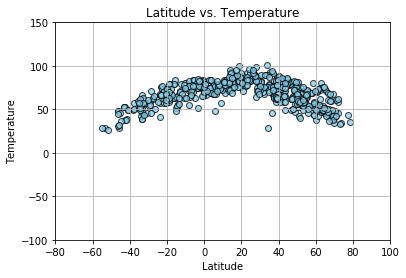

In [26]:
lat_temp_scatter = plt.scatter(weather_data['Lat'],weather_data['Max Temp'], marker = 'o', facecolors = 'skyblue', edgecolors = 'black', alpha = 0.75)

plt.grid()
plt.xlim(-80,100)
plt.ylim(-100,150)

plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature')

plt.savefig('Temperature.png')
plt.show()

#### Latitude vs. Humidity Plot

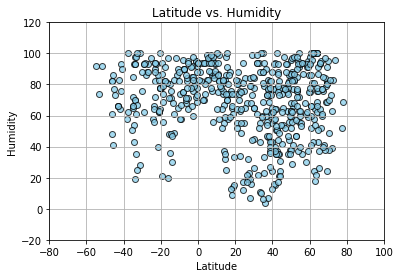

In [25]:
lat_humidity_scatter = plt.scatter(weather_data['Lat'],weather_data['Humidity'], marker = 'o', facecolors = 'skyblue', edgecolors = 'black', alpha = 0.75)

plt.grid()
plt.xlim(-80,100)
plt.ylim(-20,120)

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')

plt.savefig('Humididty.png')
plt.show()

#### Latitude vs. Cloudiness Plot

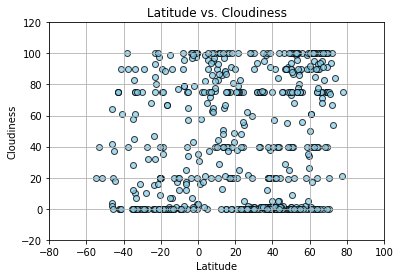

In [27]:
lat_cloud_scatter = plt.scatter(weather_data['Lat'],weather_data['Cloudiness'], marker = 'o', facecolors = 'skyblue', edgecolors = 'black', alpha = 0.75)

plt.grid()
plt.xlim(-80,100)
plt.ylim(-20,120)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')

plt.savefig('Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

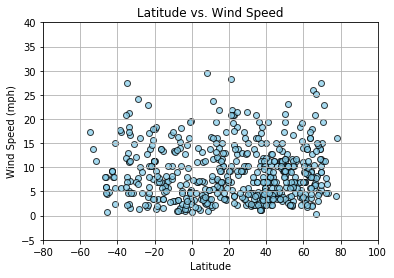

In [28]:
lat_wind_scatter = plt.scatter(weather_data['Lat'],weather_data['Wind Speed'], marker = 'o', facecolors = 'skyblue', edgecolors = 'black', alpha = 0.75)

plt.grid()
plt.xlim(-80,100)
plt.ylim(-5,40)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed')

plt.savefig('WindSpeed.png')
plt.show()